# Album-art genre classifier

## Experiment 4:
- Two output classes, 12997 images
- Artists file used to create dataset: 

## Summary:
- Getting slightly better error rate than exp-1 (which had smaller dataset)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
DATA_PATH = '../local_only_data/exp4'

In [4]:
BATCH_SIZE = 64

In [5]:
path = Path(DATA_PATH)

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.08,
        ds_tfms=get_transforms(do_flip=False, max_rotate=0.2, max_warp=0.2), size=224, num_workers=4, bs=BATCH_SIZE).normalize(imagenet_stats)

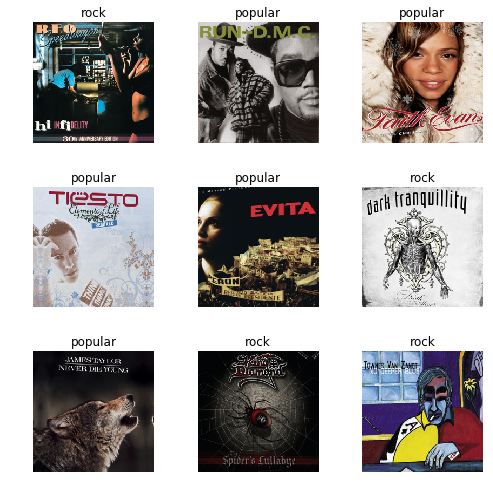

In [7]:
data.show_batch(rows=3, figsize=(7,7))

In [7]:
print(data.classes)
print(f'Training size: {len(data.train_ds)}')
print(f'Validation size: {len(data.valid_ds)}')
print(f'Total: {len(data.train_ds) + len(data.valid_ds)}')

['popular', 'rock']
Training size: 11935
Validation size: 1062
Total: 12997


## Training ResNet-50

In [8]:
learn2 = create_cnn(data, models.resnet50, metrics=error_rate)

In [10]:
learn2.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


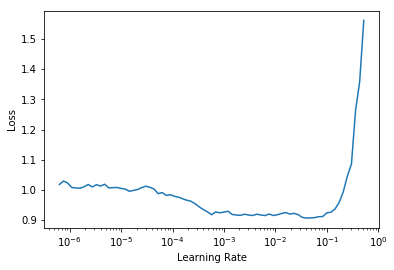

In [11]:
learn2.recorder.plot()

In [9]:
lr = 3e-4

In [16]:
learn2.fit_one_cycle(4, max_lr=lr)

Total time: 12:50
epoch  train_loss  valid_loss  error_rate
1      0.686935    0.576007    0.295669    (03:12)
2      0.605747    0.534983    0.276836    (03:12)
3      0.514598    0.516159    0.253296    (03:12)
4      0.492023    0.504675    0.256121    (03:12)



In [17]:
learn2.save('exp-4-stage-1')

In [10]:
learn2.load('exp-4-stage-1')

In [11]:
learn2.unfreeze()

In [12]:
learn2.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


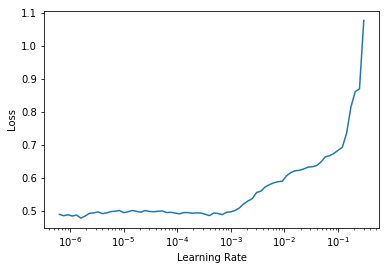

In [13]:
learn2.recorder.plot()

In [14]:
learn2.fit_one_cycle(4, max_lr=1e-4)

Total time: 17:41
epoch  train_loss  valid_loss  error_rate
1      0.494914    0.498381    0.235405    (04:35)
2      0.432502    0.445028    0.209981    (04:21)
3      0.268431    0.482481    0.197740    (04:21)
4      0.144969    0.487329    0.197740    (04:21)



In [15]:
learn2.save('exp-4-stage-2')

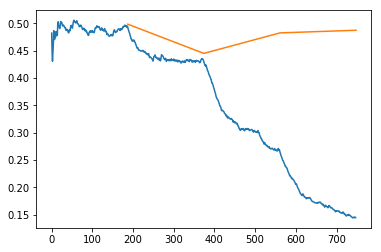

In [16]:
learn2.recorder.plot_losses()

In [17]:
learn2.load('exp-4-stage-1')

In [18]:
learn2.unfreeze()

In [19]:
learn2.fit_one_cycle(2, max_lr=1e-4)

Total time: 08:44
epoch  train_loss  valid_loss  error_rate
1      0.512533    0.486953    0.244821    (04:22)
2      0.364614    0.441977    0.204331    (04:22)



In [20]:
learn2.save('exp-4-stage-2-v2')

In [21]:
interp = ClassificationInterpretation.from_learner(learn2)

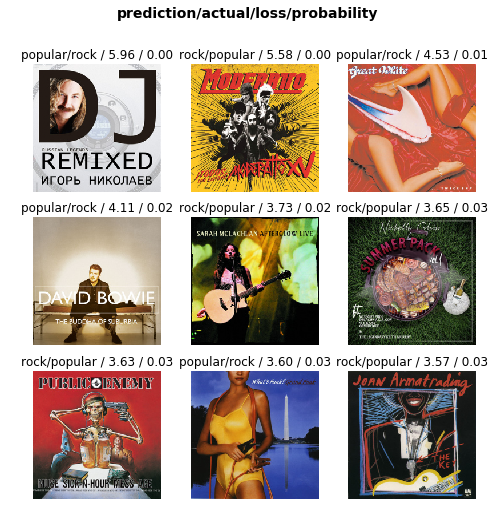

In [23]:
interp.plot_top_losses(9, figsize=(8,8))

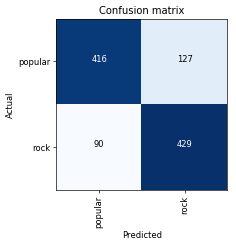

In [24]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)